In [1]:
import pickle
# Input: 变量名，保存路径
# Output: 保存路径
def save_variable1(v, filename):
    f = open(filename, 'wb')
    pickle.dump(v, f, 0)  # 在dump()里加上第三个参数，设为0(ASCII协议).
    f.close()
    return filename

In [2]:
# Input: 保存的变量路径
# Output: 变量
def load_variable1(filename):
    f = open(filename, 'rb')
    r = pickle.load(f)
    f.close()
    return r

In [6]:
# 变量所在路径
road_var = 'wordFreqDictMulThread_WithType.txt'
FreqDict = load_variable1(road_var)

firstKey = next(iter(FreqDict))

firstValue = FreqDict.get(firstKey)
totalNum_words = firstValue[0]
totalNum_distinctWords = firstValue[1]
totalWordDict = firstValue[2]

print(firstKey)
print(firstValue[0])
print(firstValue[1])
# print(firstValue[2]) # 存放的是高频词 & 对应的词出现的次数

col_weibo_timePeriod0
17104459
63090


## 1. 绘图 + 展示

['col_weibo_timePeriod0', 'col_weibo_timePeriod1', 'col_weibo_timePeriod2', 'col_weibo_timePeriod3', 'col_weibo_timePeriod4', 'col_weibo_timePeriod5', 'col_weibo_timePeriod6', 'col_weibo_timePeriod7', 'col_weibo_timePeriod8', 'col_weibo_timePeriod9', 'col_weibo_timePeriod10', 'col_weibo_timePeriod11', 'col_weibo_timePeriod12', 'col_weibo_timePeriod13', 'col_weibo_timePeriod14', 'col_weibo_timePeriod15', 'col_weibo_timePeriod16', 'col_weibo_timePeriod17', 'col_weibo_timePeriod18', 'col_weibo_timePeriod19', 'col_weibo_timePeriod20', 'col_weibo_timePeriod21', 'col_weibo_timePeriod22', 'col_weibo_timePeriod23']


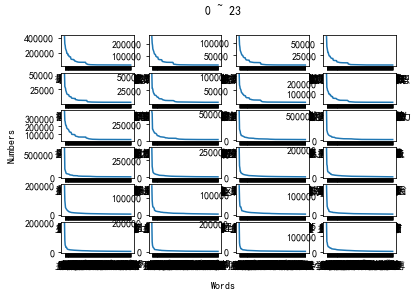

In [16]:
# 设计函数绘图 + 展示
# Input: 字典数据，指定的key
# Output: None(保存图片)

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import ImageFont


plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False


def drawAnddisp(FreqDict, colPackages):
    fig = plt.figure()
    c = 0  # 指定图像的位置
    for i in range(0, 24):
        c = c + 1
        key = colPackages[i]
        cur_WordDict = FreqDict.get(key)[2]
        x = list(cur_WordDict.keys())
        y = list(cur_WordDict.values())
        ax = fig.add_subplot(6,4,c) 
        ax.plot(x, y)
        fig.suptitle("0 ~ 23")
        
    fig.text(0.5, 0, 'Words', ha='center')
    fig.text(0, 0.5, 'Numbers', va='center', rotation='vertical')
    plt.show()
    
if __name__ == '__main__':
    # 循环操作24个集合：新建指定字段
    subCol24 = list()
    subCol24.append(["col_weibo_timePeriod" + str(period) for period in range(0, 24)])
    print(subCol24[0])
    colPackages = subCol24[0]
    
    road_var = 'wordFreqDictMulThread_WithType.txt'
    FreqDict = load_variable1(road_var)
    
    drawAnddisp(FreqDict, colPackages)

## 2. 绘图 + 保存

In [20]:
# 设计函数绘图 + 保存
# Input: 字典数据，指定的key
# Output: None(保存图片)

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import ImageFont


plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False


def drawAndsave(FreqDict, colKey):
    cur_WordDict = FreqDict.get(colKey)[2]  # 下标为2的存的是词频字典
    
    # ------------------------------------------ 词频图
    x1 = list(cur_WordDict.keys())
    y1 = list(cur_WordDict.values())
    plt.subplot(211)  # 切割子图，数字含义是将整个画面切割为2行1列，当前选用第1个切割块
    plt.plot(x1, y1)
    plt.xticks(rotation=60)  # 设置x轴上的刻度旋转角度
    plt.ylabel('次数')
    plt.title(colKey + '频次图')

    plt.subplot(212)  # 切割子图，数字含义是将整个画面切割为2行1列，当前选用第2个切割块
    plt.bar(x1, y1)
    plt.xticks(rotation=60)  # 设置x轴上的刻度旋转角度
    plt.xlabel('分词')
    plt.ylabel('次数')
    saveRoad1 = 'E:\\' + colKey + '_lineBar.jpg'
    plt.savefig(saveRoad1, dpi=500)
    plt.close() # 可以保证不窜图（不显示图，而直接保存）
    
    # ------------------------------------------ 词云图
    font = 'msyh.ttc'
    wc = WordCloud(
        background_color='white',  # 设置背景色，默认为黑色
        font_path=font,  # 指定文字路径
        width=500,  # 设置背景宽
        height=350,  # 设置背景高
        max_font_size=50,  # 最大字体
        min_font_size=10,  # 最小字体
        mode='RGBA'  # 当参数为“RGBA”并且background_color不为空时，背景为透明
    )

    wc.generate_from_frequencies(cur_WordDict)
    saveRoad1 = 'E:\\' + colKey + '_wordCloud.png'
    wc.to_file(saveRoad1)    
    
    
if __name__ == '__main__':
    # 循环操作24个集合：新建指定字段
    subCol24 = list()
    subCol24.append(["col_weibo_timePeriod" + str(period) for period in range(0, 24)])
    print(subCol24[0])
    colPackages = subCol24[0]
    
    road_var = 'wordFreqDictMulThread_WithType.txt'
    FreqDict = load_variable1(road_var)
    
    for i in range(0, len(colPackages)):
        print(colPackages[i])
        drawAndsave(FreqDict, colPackages[i])  # 总字典，各个key。按key从字典中取值，绘图并保存

['col_weibo_timePeriod0', 'col_weibo_timePeriod1', 'col_weibo_timePeriod2', 'col_weibo_timePeriod3', 'col_weibo_timePeriod4', 'col_weibo_timePeriod5', 'col_weibo_timePeriod6', 'col_weibo_timePeriod7', 'col_weibo_timePeriod8', 'col_weibo_timePeriod9', 'col_weibo_timePeriod10', 'col_weibo_timePeriod11', 'col_weibo_timePeriod12', 'col_weibo_timePeriod13', 'col_weibo_timePeriod14', 'col_weibo_timePeriod15', 'col_weibo_timePeriod16', 'col_weibo_timePeriod17', 'col_weibo_timePeriod18', 'col_weibo_timePeriod19', 'col_weibo_timePeriod20', 'col_weibo_timePeriod21', 'col_weibo_timePeriod22', 'col_weibo_timePeriod23']
col_weibo_timePeriod0
col_weibo_timePeriod1
col_weibo_timePeriod2
col_weibo_timePeriod3
col_weibo_timePeriod4
col_weibo_timePeriod5
col_weibo_timePeriod6
col_weibo_timePeriod7
col_weibo_timePeriod8
col_weibo_timePeriod9
col_weibo_timePeriod10
col_weibo_timePeriod11
col_weibo_timePeriod12
col_weibo_timePeriod13
col_weibo_timePeriod14
col_weibo_timePeriod15
col_weibo_timePeriod16
col_